
<div class="alert alert-block alert-warning"><h2 style="text-align:Center;color:red">Parkinson Hastalığı Erken Tespiti ve Doğru Tanısı </h2> </div>


* Parkinson hastalığı, beyin hücrelerinin birbirleriyle iletişim kurmasını sağlayan dopamin adı verilen bir maddeyi üreten hücrelerin bozulmasından kaynaklanır. Beyindeki dopamin üreten hücreler, hareketlerin kontrolü, uyumu ve akıcılığından sorumludur. Hem motor hem de motor olmayan özelliklerle karakterize kronik, ilerleyici bir nörodejeneratif hastalıktır. PD, dünyada en sık görülen ikinci nörodejeneratif hastalıktır. Dünyada 10 milyon, Türkiye'de yaklaşık 100-130 bin kişinin Parkinson hastası olduğu varsayılmaktadır.
* Kesin bir tanı yönteminin olmaması nedeniyle ve hastalarda belirtiler zamanla yavaş bir şekilde ortaya çıkar ve erken aşamalarda tespit edilmesi oldukça zordur. PD'nin erken ve doğru tanısı, zamanında müdahale ve kişiselleştirilmiş tedavi için çok önemlidir. Makine öğrenimi algoritmaları hastalıkları tahmin etmek ve teşhis etmek için bir araç olarak kullanılmıştır

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
df = pd.read_csv('/content/drive/My Drive/archive/parkinsons_disease_data.csv')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

Veri setinde 34 değişken ve her değişkenin 2105 gözlemi bulunuyor. Hiçbir değişkende kayıp veri yok.

Örneklem büyüklüğü satır sayısına (gözlem sayısına), değişken sayısı ise sütun sayısına (özellik + etiket sayısına) eşittir.
* Örneklem büyüklüğü (n): 2105
* Değişken sayısı (p): 35


In [110]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')



*   **PatientID**: Hasta Kimliği
*   **Age**: Yaş; 50 ile 90 arasında değişmektedir.
*   **Gender**: Cinsiyet; 0 Erkek, 1 Kadın'ı temsil etmektedir.
*   **Ethnicity**: Etnik Köken; 0: Kafkasyalı, 1: Afro-Amerikan, 2: Asyalı, 3: Diğer
*   **EducationLevel**: Eğitim Seviyesi; 0: Hiçbiri, 1: Lise, 2: Lisans, 3: Daha yüksek
*   **BMI**: Vücut Kütle İndeksi; 15 ile 40 arasında değişir.
*   **Smoking**: Sigara; 0 Hayır'ı, 1 Evet'i belirtir.
*   **AlcoholConsumption**: Alkol Tüketimi; 0 ile 20 arasında değişen miktarlarda haftalık alkol tüketimi.
*   **PhysicalActivity**: Fiziksel Aktivite; 0 ile 10 arasında değişen haftalık fiziksel aktivitenin saat cinsinden değeri.
*   **DietQuality**: Beslenme Düzeni Kalitesi; 0 ile 10 arasında değişmektedir.
*   **SleepQuality**: Uyku Kalitesi; 4 ile 10 arasında değişmektedir.
*   **FamilyHistoryParkinsons**:  Parkinson Hastalığının Aile Özgeçmişi; 0 Hayır'ı, 1 Evet'i belirtir.
*   **Hypertension**: Hipertansiyon; 0 Hayır, 1 Evet anlamına gelir.
*   **Diabetes**: Diyabetin varlığı; 0 Hayır'ı, 1 Evet'i belirtir.
*   **Depression**: Depresyonun varlığı; 0 Hayır'ı, 1 Evet'i belirtir.
*   **Stroke**: İnme; 0 Hayır, 1 Evet anlamına gelir.
*   **SystolicBP**: Sistolik kan basıncı, 90 ila 180 mmHg arasında değişir.

*   **DiastolicBP**: Diyastolik kan basıncı, 60 ila 120 mmHg arasında değişir.
*   **CholesterolTotal**: Toplam kolesterol düzeyi, 150 ile 300 mg/dL arasında değişir.
*   **CholesterolLDL**: Düşük yoğunluklu lipoprotein kolesterol düzeyİ, 50 ile 200 mg/dL arasında değişir.
*   **CholesterolHDL**:  Yüksek yoğunluklu lipoprotein kolesterol düzeyi; 20 ile 100 mg/dL arasında değişir.
*   **CholesterolTriglycerides**: Trigliserid düzeyleri 50 ile 400 mg/dL arasında değişmektedir.
*   **UPDRS**: Birleşik Parkinson Hastalığı Değerlendirme Ölçeği puanı, 0 ile 199 arasında değişmektedir. Daha yüksek puanlar hastalığın daha şiddetli olduğunu göstermektedir.
*   **MoCA**: Montreal Bilişsel Değerlendirme puanı 0 ile 30 arasında değişmektedir. Daha düşük puanlar bilişsel bozukluğu göstermektedir.
*   **FunctionalAssessment**: Fonksiyonel değerlendirme puanı 0 ile 10 arasında değişmektedir. Daha düşük puanlar daha fazla bozulmayı göstermektedir.
*   **Tremor**: Titreme hastalığının varlığı, 0 Hayır'ı, 1 Evet'i belirtir.
*   **Rigidity**: Kas rijiditesinin varlığı, 0 Hayır, 1 Evet anlamına gelir.
*   **Bradykinesia**: Bradikinezinin (hareket yavaşlığı) varlığı, 0 Hayır'ı, 1 Evet'i belirtir.
*   **PosturalInstability**: Postural instabilitenin varlığı, 0 Hayır, 1 Evet anlamına gelir.
*   **SpeechProblems**: Konuşma sorunlarının varlığı, 0 Hayır, 1 Evet anlamına gelir.
*   **SleepDisorders**: Uyku bozukluklarının varlığı, 0 Hayır, 1 Evet anlamına gelir.
*   **Constipation**: Konstipasyon varlığı, 0 Hayır, 1 Evet anlamına gelir.
*   **Diagnosis**:  Parkinson Hastalığı için tanı durumu; 0 Hayır, 1 Evet anlamına gelir.
*   **DoctorInCharge**:  Bu sütun, sorumlu doktor hakkında gizli bilgileri içerir ve tüm hastalar için değer olarak "DrXXXConfid" kullanılır.












**İlk 5 Satır**

In [111]:
print(df.head())

   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       3058   85       0          3               1  19.619878        0   
1       3059   75       0          0               2  16.247339        1   
2       3060   70       1          0               0  15.368239        0   
3       3061   52       0          0               0  15.454557        0   
4       3062   87       0          0               1  18.616042        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
0            5.108241          1.380660     3.893969  ...   
1            6.027648          8.409804     8.513428  ...   
2            2.242135          0.213275     6.498805  ...   
3            5.997788          1.375045     6.715033  ...   
4            9.775243          1.188607     4.657572  ...   

   FunctionalAssessment  Tremor  Rigidity  Bradykinesia  PosturalInstability  \
0              1.572427       1         0             0                    0   
1              4

Tanı : Parkinson Hastalığı için tanı durumu; 0 Hayır, 1 Evet anlamına gelir. Hangi sınıftan kaç tane olduğuna bakalım.

In [112]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
1,1304
0,801


* **Toplam veri sayısı:** 1304 + 801 = 2105
* **Sınıf oranları:**
* **1:**
1304/2105 ≈0.62 (%62)
* **0:**
801/2105≈0.38 (%38)
* Bu veri seti hafifçe dengesiz bir veri setidir.

## **Normal Dağılıma Uygunluk Testleri**
* H0 hipotezi: Verinizin dağılımı normaldir.
* p-değeri < 0.05 ise, dağılımın normal olmadığına karar verilir.
* p değerinin 0.05’ten küçük olması durumunda: H0 hipotezi red edilir yani verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.
* p değerinin 0.05’ten büyük olması durumunda: H0 hipotezi red edilemez yani verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.

Örneklem sayısı 50 ve altındaysa Shapiro- Wilk Testi'ne, 50 üzerindeyse Kolmogorov- Smirnov Testi'ne bakılır.

In [113]:
from scipy.stats import kstest, norm
import numpy as np

# Veri setindeki sayısal sütunları seç
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Her bir sütun için Kolmogorov-Smirnov normallik testini uygula
results = {}
for col in numerical_columns:
    data = df[col].dropna()  # Eksik verileri kaldır
    standardized_data = (data - data.mean()) / data.std()  # Veriyi standart normal dağılıma göre dönüştür
    stat, p_value = kstest(standardized_data, 'norm')  # Normal dağılım hipotezine karşı test
    results[col] = {'KS Statistic': stat, 'p-value': p_value}

# Sonuçları yazdır
for col, result in results.items():
    print(f"{col}:")
    print(f"  Kolmogorov-Smirnov Statistic: {result['KS Statistic']:.4f}")
    print(f"  p-value: {result['p-value']:.4f}")
    if result['p-value'] > 0.05:
        print("  -> Dağılım normaldir.")
    else:
        print("  -> Dağılım normal değildir.")
    print()

PatientID:
  Kolmogorov-Smirnov Statistic: 0.0574
  p-value: 0.0000
  -> Dağılım normal değildir.

Age:
  Kolmogorov-Smirnov Statistic: 0.0692
  p-value: 0.0000
  -> Dağılım normal değildir.

Gender:
  Kolmogorov-Smirnov Statistic: 0.3451
  p-value: 0.0000
  -> Dağılım normal değildir.

Ethnicity:
  Kolmogorov-Smirnov Statistic: 0.3582
  p-value: 0.0000
  -> Dağılım normal değildir.

EducationLevel:
  Kolmogorov-Smirnov Statistic: 0.2301
  p-value: 0.0000
  -> Dağılım normal değildir.

BMI:
  Kolmogorov-Smirnov Statistic: 0.0666
  p-value: 0.0000
  -> Dağılım normal değildir.

Smoking:
  Kolmogorov-Smirnov Statistic: 0.4454
  p-value: 0.0000
  -> Dağılım normal değildir.

AlcoholConsumption:
  Kolmogorov-Smirnov Statistic: 0.0587
  p-value: 0.0000
  -> Dağılım normal değildir.

PhysicalActivity:
  Kolmogorov-Smirnov Statistic: 0.0727
  p-value: 0.0000
  -> Dağılım normal değildir.

DietQuality:
  Kolmogorov-Smirnov Statistic: 0.0587
  p-value: 0.0000
  -> Dağılım normal değildir.

Slee

Veri setindeki değişkenler normal dağılıma uymadığı için özellik seçimi için non-parametric testler uygulanır.

* **SÜREKLİ DEĞİŞKENLER:** Sürekli değişkenler, ölçülebilen ve iki değer arasında sonsuz sayıda ara değeri alabilen değişkenlerdir.
* **KATEGORİK DEĞİŞKENLER:** Kategorik değişkenler, grupları veya kategorileri temsil eden ve genellikle sayısal bir anlam taşımayan değişkenlerdir.
 * 'Gender',
 * 'Ethnicity',
 * 'EducationLevel',
 * 'Smoking',
 * 'FamilyHistoryParkinsons',
 * 'Hypertension',
 * 'Diabetes',
 * 'Depression',
 * 'Stroke',
 * 'Tremor',
 * 'Rigidity',
 * 'Bradykinesia',
 * 'PosturalInstability',
 * 'SpeechProblems',
 * 'SleepDisorders',
 * 'Constipation',
 * 'Diagnosis'

## **Kategorik Değişkenler İçin Ki-Kare (Chi-Square) Testi**
* Ki-kare bağımsızlık test, iki veya daha fazla değişkenin birbirinden bağımsız olup olmadığının araştırılması için kullanılır.
* Kategorik veriler için uygundur.
**kalın metin**
* **Ki-Kare Testi Sonuçları**
* Eğer p-değeri küçükse (genellikle 0.05'ten küçük), bu özellik hedef değişkenle anlamlı bir ilişki gösteriyor demektir.
* p-değeri 0.05’ten büyükse, bu özellik hedef değişkenle bağımsız demektir ve genellikle modelin doğruluğunu artırmak için dışarıda bırakılabilir.
* Chi-Square Skorları, her bir özelliğin hedef değişken (bu durumda Diagnosis) ile ne kadar ilişkili olduğunu gösterir. Yüksek bir skor, o özelliğin hedef değişkenle güçlü bir ilişki içinde olduğunu, düşük bir skor ise çok az bir ilişki olduğunu gösterir.

In [114]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Kategorik değişkenler (özellikler)
categorical_columns = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
                       'FamilyHistoryParkinsons', 'Hypertension', 'Diabetes',
                       'Depression', 'Stroke', 'Tremor', 'Rigidity', 'Bradykinesia',
                       'PosturalInstability', 'SpeechProblems', 'SleepDisorders',
                       'Constipation', 'Diagnosis']

# X (özellikler) ve y (hedef değişken) oluşturma
X = df[categorical_columns].drop('Diagnosis', axis=1)  # Hedef değişkeni çıkartıyoruz
y = df['Diagnosis']

# Ki-Kare testini uygulamak
chi2_selector = SelectKBest(chi2, k='all')  # 'all' ile tüm özellikleri değerlendireceğiz
X_new_chi2 = chi2_selector.fit_transform(X, y)

# Sonuçları yazdırmak
chi2_scores = chi2_selector.scores_
p_values = chi2_selector.pvalues_

# Sonuçları bir araya getirme ve formatı düzenleme
selected_features_chi2 = pd.DataFrame({
    'Feature': categorical_columns[:-1],  # 'Diagnosis' hedef değişkenini hariç tutuyoruz
    'p-value': p_values,
    'Chi-Square Score': chi2_scores
})

# P değerine göre sıralama
selected_features_chi2 = selected_features_chi2.sort_values(by='p-value')

# Sonuçları yazdırma
print(selected_features_chi2)


                    Feature       p-value  Chi-Square Score
9                    Tremor  2.341767e-21         90.033370
11             Bradykinesia  5.626989e-14         56.497499
10                 Rigidity  1.817999e-13         54.192278
12      PosturalInstability  3.357931e-10         39.454500
7                Depression  1.566946e-02          5.839592
6                  Diabetes  1.567378e-02          5.839107
8                    Stroke  2.087515e-01          1.580064
15             Constipation  3.298805e-01          0.949367
4   FamilyHistoryParkinsons  5.709533e-01          0.321090
0                    Gender  5.821983e-01          0.302694
5              Hypertension  6.232039e-01          0.241390
13           SpeechProblems  6.378256e-01          0.221597
14           SleepDisorders  6.732760e-01          0.177794
1                 Ethnicity  7.791781e-01          0.078619
3                   Smoking  8.401623e-01          0.040677
2            EducationLevel  8.713689e-0

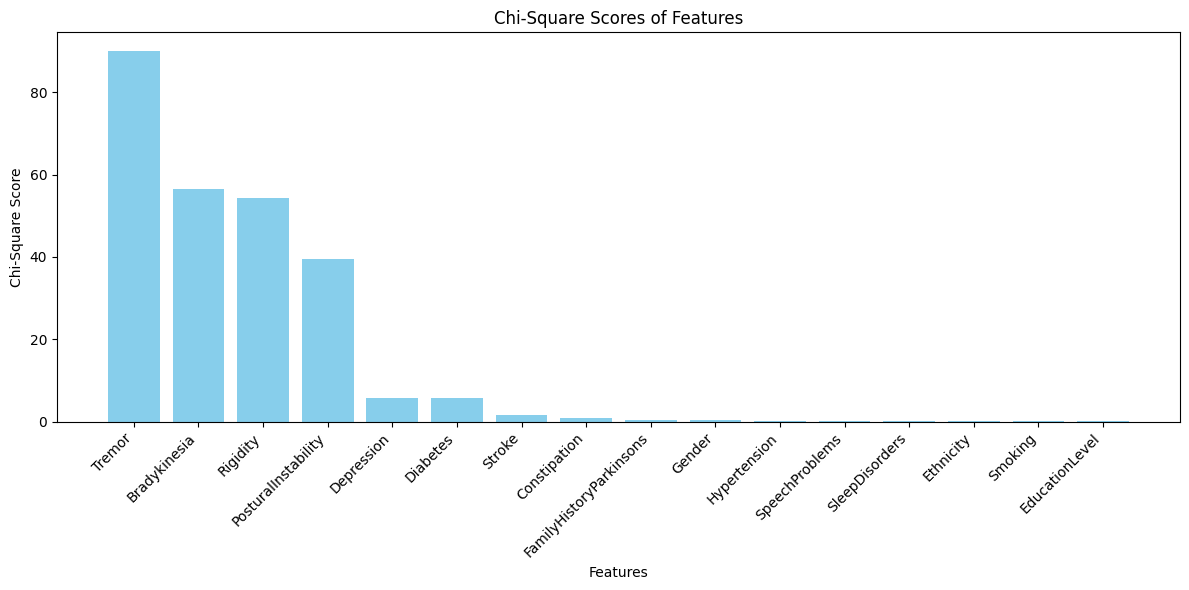

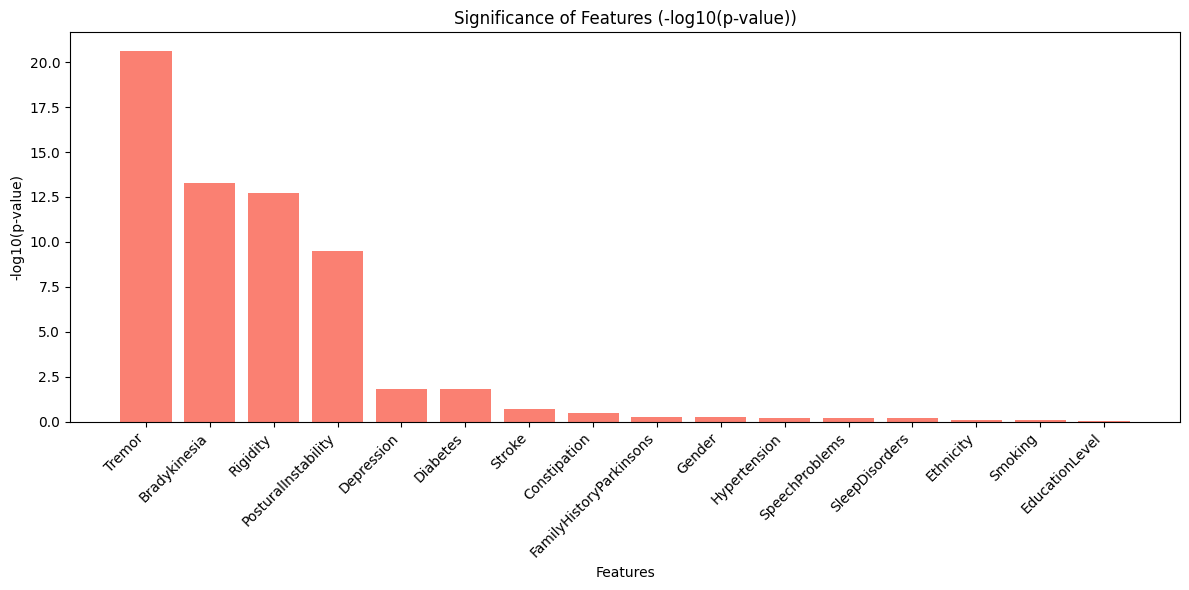

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Bar grafiği: Chi-Square puanlarına göre
plt.figure(figsize=(12, 6))
plt.bar(selected_features_chi2['Feature'], selected_features_chi2['Chi-Square Score'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Chi-Square Score')
plt.title('Chi-Square Scores of Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Alternatif: p-değerine göre -log(p-value) grafiği
plt.figure(figsize=(12, 6))
plt.bar(selected_features_chi2['Feature'], -np.log10(selected_features_chi2['p-value']), color='salmon')
plt.xlabel('Features')
plt.ylabel('-log10(p-value)')
plt.title('Significance of Features (-log10(p-value))')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


 **AYIRT EDİCİ ÖZELLİKLERİN SEÇİMİ**
* 0.05'TEN KÜÇÜK DEĞERLER AYIRT EDİCİ ÖZELLİKLERDİR


In [116]:
# Ayırt edici özellikleri seçmek (p-değeri <= 0.05 olanlar)
categorical_discriminative_features = selected_features_chi2[selected_features_chi2['p-value'] <= 0.05]

# Sadece ayırt edici özelliklerin listesini alma
categorical_selected_features = categorical_discriminative_features['Feature'].tolist()

# Sonuçları yazdırma
print("Ayırt edici özellikler (p <= 0.05):")
print(categorical_discriminative_features)
print("\nSeçilen özellik isimleri:")
print(categorical_selected_features)


Ayırt edici özellikler (p <= 0.05):
                Feature       p-value  Chi-Square Score
9                Tremor  2.341767e-21         90.033370
11         Bradykinesia  5.626989e-14         56.497499
10             Rigidity  1.817999e-13         54.192278
12  PosturalInstability  3.357931e-10         39.454500
7            Depression  1.566946e-02          5.839592
6              Diabetes  1.567378e-02          5.839107

Seçilen özellik isimleri:
['Tremor', 'Bradykinesia', 'Rigidity', 'PosturalInstability', 'Depression', 'Diabetes']


Bir modelin performansını artırmak için anlamlı özelliklerin seçilmesi önemlidir.

# **Sürekli Değişkenler İçin Mann Whitney U Testi**
Mann-Whitney U testi, parametrik olmayan bir testtir ve iki bağımsız grup arasındaki farkları incelemek için kullanılır.

In [117]:
from scipy import stats
import pandas as pd

# Sürekli değişkenler
continuous_columns = ['Age','BMI', 'AlcoholConsumption', 'PhysicalActivity',
                      'DietQuality', 'SleepQuality', 'SystolicBP','DiastolicBP',
                      'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
                      'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment']

target = 'Diagnosis'  # Kategorik hedef değişken (örneğin: 'Diagnosis' -> 'hasta' veya 'hasta değil')

# X (özellikler) ve y (hedef değişken) oluşturma
X = df[continuous_columns]
y = df[target]

# Kategorik hedef değişkenin sınıflarını alalım
class_labels = y.unique()

# Mann-Whitney U testini her sürekli özellik için yapalım
mann_whitney_results = []

for column in continuous_columns:
    # Her özellik için Mann-Whitney U testi
    group1 = X[y == class_labels[0]][column]
    group2 = X[y == class_labels[1]][column]
    u_stat, p_value = stats.mannwhitneyu(group1, group2)
    mann_whitney_results.append((column, u_stat, p_value))

# Sonuçları bir dataframe'e çevirelim
mann_whitney_df = pd.DataFrame(mann_whitney_results, columns=['Feature', 'U-Statistic', 'p-value'])

# Sonuçları p-değerine göre sıralama
mann_whitney_df = mann_whitney_df.sort_values(by='p-value')

print(mann_whitney_df)


                     Feature  U-Statistic       p-value
12                     UPDRS     277736.0  6.606927e-73
14      FunctionalAssessment     661430.0  8.710536e-25
13                      MoCA     630679.0  1.162789e-15
0                        Age     482514.0  3.325177e-03
5               SleepQuality     549167.0  4.682368e-02
2         AlcoholConsumption     499863.0  9.820810e-02
1                        BMI     503658.0  1.696570e-01
7                DiastolicBP     540115.5  1.869841e-01
4                DietQuality     536359.0  2.974585e-01
10            CholesterolHDL     534347.0  3.716999e-01
8           CholesterolTotal     534167.0  3.788598e-01
11  CholesterolTriglycerides     512448.0  4.690156e-01
9             CholesterolLDL     513262.0  5.067159e-01
3           PhysicalActivity     514451.0  5.645198e-01
6                 SystolicBP     524887.0  8.457091e-01


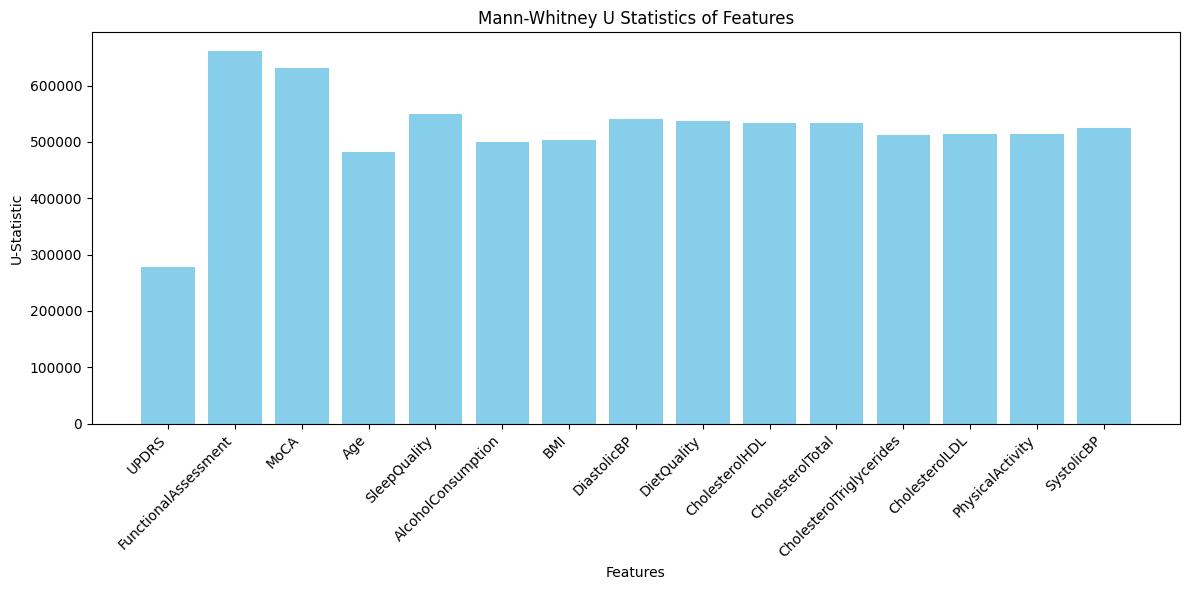

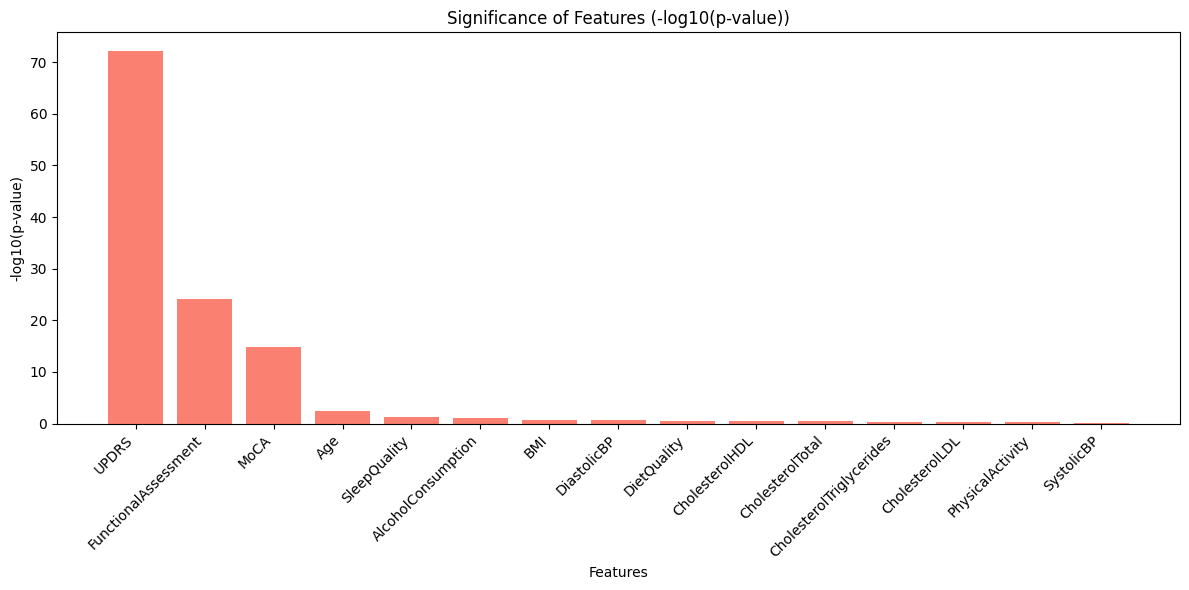

In [119]:
import matplotlib.pyplot as plt
import numpy as np

# U-Statistic için bar grafiği
plt.figure(figsize=(12, 6))
plt.bar(mann_whitney_df['Feature'], mann_whitney_df['U-Statistic'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('U-Statistic')
plt.title('Mann-Whitney U Statistics of Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# p-value için -log10(p-value) bar grafiği
plt.figure(figsize=(12, 6))
plt.bar(mann_whitney_df['Feature'], -np.log10(mann_whitney_df['p-value']), color='salmon')
plt.xlabel('Features')
plt.ylabel('-log10(p-value)')
plt.title('Significance of Features (-log10(p-value))')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Sürekli Değişkenlere Göre Ayırt Edici Özellikleri Seçmek**

In [120]:
# Ayırt edici özellikleri seçme (p <= 0.05)
continuous_discriminative_features = mann_whitney_df[mann_whitney_df['p-value'] <= 0.05]
continuous_selected_features = continuous_discriminative_features['Feature'].tolist()

# Sonuçları yazdırma
print("Mann-Whitney U Testi Sonuçları:")
print(mann_whitney_df)
print("\nAyırt Edici Özellikler (p <= 0.05):")
print(continuous_selected_features)

Mann-Whitney U Testi Sonuçları:
                     Feature  U-Statistic       p-value
12                     UPDRS     277736.0  6.606927e-73
14      FunctionalAssessment     661430.0  8.710536e-25
13                      MoCA     630679.0  1.162789e-15
0                        Age     482514.0  3.325177e-03
5               SleepQuality     549167.0  4.682368e-02
2         AlcoholConsumption     499863.0  9.820810e-02
1                        BMI     503658.0  1.696570e-01
7                DiastolicBP     540115.5  1.869841e-01
4                DietQuality     536359.0  2.974585e-01
10            CholesterolHDL     534347.0  3.716999e-01
8           CholesterolTotal     534167.0  3.788598e-01
11  CholesterolTriglycerides     512448.0  4.690156e-01
9             CholesterolLDL     513262.0  5.067159e-01
3           PhysicalActivity     514451.0  5.645198e-01
6                 SystolicBP     524887.0  8.457091e-01

Ayırt Edici Özellikler (p <= 0.05):
['UPDRS', 'FunctionalAssessment', '

In [121]:
print(categorical_selected_features)
print(continuous_selected_features)

['Tremor', 'Bradykinesia', 'Rigidity', 'PosturalInstability', 'Depression', 'Diabetes']
['UPDRS', 'FunctionalAssessment', 'MoCA', 'Age', 'SleepQuality']


In [122]:
ayırt_edici_özellikler = ['Tremor', 'Bradykinesia', 'Rigidity', 'PosturalInstability', 'Depression', 'Diabetes','UPDRS', 'FunctionalAssessment', 'MoCA', 'Age', 'SleepQuality']
print(ayırt_edici_özellikler)

['Tremor', 'Bradykinesia', 'Rigidity', 'PosturalInstability', 'Depression', 'Diabetes', 'UPDRS', 'FunctionalAssessment', 'MoCA', 'Age', 'SleepQuality']


*Ayırt Edici Özellikleri Kullanarak Modeli Eğitim ve Test Verisine Ayır*

In [123]:
from sklearn.model_selection import train_test_split

# Seçilen ayırt edici özellikleri kullanarak X ve y oluştur
X_selected = df[ayırt_edici_özellikler]  # Özellikler
y = df['Diagnosis']  # Hedef değişken

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=0)

*Normalizasyon*

In [124]:
from sklearn.preprocessing import StandardScaler

# Standartlaştırma (z-score normalizasyonu)
scaler = StandardScaler()

# Eğitim verilerini fit et ve dönüştür
X_train_scaled = scaler.fit_transform(X_train)

# Test verilerini yalnızca dönüştür (fit yapılmaz)
X_test_scaled = scaler.transform(X_test)


## **Özellik Seçimi ile KNN**

In [128]:
from sklearn import metrics

Ks=70
mean_acc =np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):

  neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_scaled,y_train)
  y_hat=neigh.predict(X_test_scaled)
  mean_acc[n-1]=metrics.accuracy_score(y_test,y_hat)
  std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
mean_acc



array([0.80265655, 0.78368121, 0.84440228, 0.84060721, 0.84819734,
       0.83870968, 0.83870968, 0.84819734, 0.84060721, 0.84819734,
       0.84819734, 0.85199241, 0.85199241, 0.85009488, 0.84440228,
       0.84250474, 0.85009488, 0.84819734, 0.84060721, 0.84060721,
       0.84250474, 0.85578748, 0.84440228, 0.84629981, 0.84440228,
       0.84629981, 0.84060721, 0.83681214, 0.84440228, 0.84819734,
       0.84250474, 0.83870968, 0.83681214, 0.84060721, 0.83870968,
       0.83491461, 0.83111954, 0.83111954, 0.82732448, 0.83491461,
       0.82922201, 0.82732448, 0.83111954, 0.83491461, 0.82542694,
       0.83870968, 0.82922201, 0.83301708, 0.82732448, 0.83301708,
       0.83301708, 0.83111954, 0.82922201, 0.83111954, 0.82922201,
       0.83491461, 0.83111954, 0.83301708, 0.83111954, 0.83301708,
       0.82542694, 0.82352941, 0.82542694, 0.83111954, 0.82732448,
       0.82922201, 0.82542694, 0.82352941, 0.82542694])

In [129]:
print("En yüksek doğruluk:", mean_acc.max(),"en iyi k değeri:",mean_acc.argmax()+1, "olduğunda gerçekleşti.")

En yüksek doğruluk: 0.855787476280835 en iyi k değeri: 22 olduğunda gerçekleşti.


In [130]:
# 3. KNN modeli oluşturma ve eğitme
knn_model = KNeighborsClassifier(n_neighbors=22)  # k=9 komşu ile başlıyoruz
knn_model.fit(X_train_scaled , y_train)

# 4. Modelin test verisi üzerinde tahmin yapması
y_pred_knn = knn_model.predict(X_test_scaled)

# 5. Model performansını değerlendirme
print("Eğitim verisi doğruluğu:", metrics.accuracy_score(y_train,knn_model.predict(X_train_scaled )))
print("Test verisi doğruluğu:",metrics.accuracy_score(y_test,y_pred_knn))


Eğitim verisi doğruluğu: 0.8548795944233206
Test verisi doğruluğu: 0.855787476280835


In [131]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Sonuçları yazdırma
print("\nKarışıklık Matrisi (Confusion Matrix):")
print(conf_matrix_knn)
print("\nSınıflandırma Raporu (Classification Report):")
print(class_report_knn)


Karışıklık Matrisi (Confusion Matrix):
[[139  50]
 [ 26 312]]

Sınıflandırma Raporu (Classification Report):
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       189
           1       0.86      0.92      0.89       338

    accuracy                           0.86       527
   macro avg       0.85      0.83      0.84       527
weighted avg       0.85      0.86      0.85       527



In [132]:
# Karışıklık matrisinden metrikleri hesapla
TN, FP, FN, TP = conf_matrix_knn.ravel()

sensitivity_knn = TP / (TP + FN)
specificity_knn = TN / (TN + FP)

print("KNN Duyarlılık (Sensitivity):", sensitivity_knn)
print("KNN Özgüllük (Specificity):", specificity_knn)

f1_knn = f1_score(y_test, y_pred_knn)
print("KNN F1 Skoru:", f1_knn)

kappa_knn = cohen_kappa_score(y_test, y_pred_knn)
print("KNN Cohen's Kappa:", kappa_knn)

KNN Duyarlılık (Sensitivity): 0.9230769230769231
KNN Özgüllük (Specificity): 0.7354497354497355
KNN F1 Skoru: 0.8914285714285715
KNN Cohen's Kappa: 0.6774889683383257


AUC: 0.9056854826085595


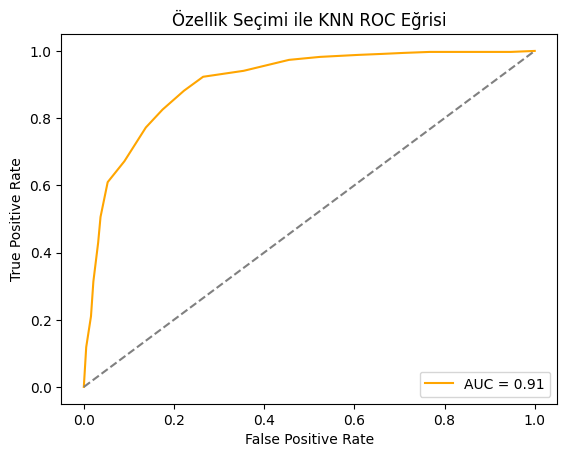

In [137]:
y_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]  # Pozitif sınıf için olasılıklar
auc_knn = roc_auc_score(y_test, y_proba_knn)

fpr, tpr, thresholds = roc_curve(y_test, y_proba_knn)
print("AUC:", auc_knn)

# ROC eğrisi çizimi
plt.figure()
plt.plot(fpr, tpr, color='orange', label=f'AUC = {auc_knn:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Özellik Seçimi ile KNN ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

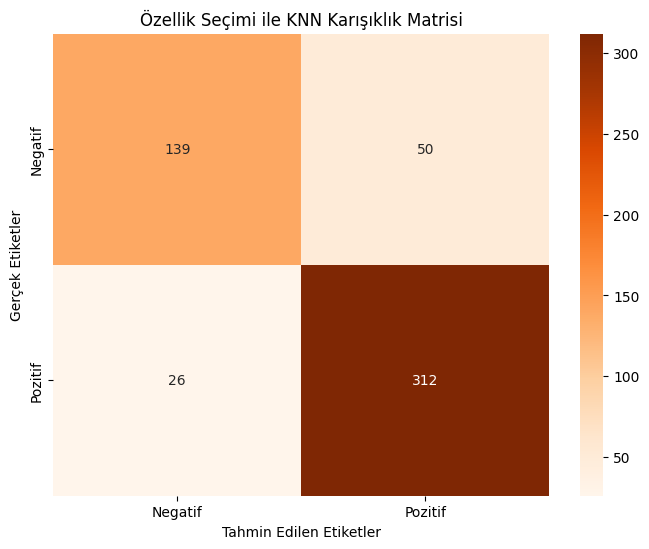

In [138]:
# Karışıklık matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Oranges', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Özellik Seçimi ile KNN Karışıklık Matrisi')
plt.show()

## **Özellik Seçimi ile SVM**

In [134]:
from sklearn.svm import SVC

# 5. Destek Vektör Makinesi (SVM) modeli oluşturma ve eğitme
svm_model = SVC(kernel='rbf', random_state=0, probability=True)  # 'rbf' çekirdek fonksiyonu kullanıyoruz
svm_model.fit(X_train_scaled, y_train)

# 6. Modelin test verisi üzerinde tahmin yapması
y_pred_svm = svm_model.predict(X_test_scaled)

# Eğitim ve test doğruluğunu yazdırma
print("Eğitim verisi doğruluğu:", accuracy_score(y_train, svm_model.predict(X_train_scaled)))
print("Test verisi doğruluğu:", accuracy_score(y_test, y_pred_svm))

# 7. Karışıklık matrisi ve diğer metrikler
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("\nKarışıklık Matrisi:")
print(conf_matrix_svm)
print("\nSınıflandırma Raporu:")
print(class_report_svm)


Eğitim verisi doğruluğu: 0.9131812420785805
Test verisi doğruluğu: 0.8842504743833017

Karışıklık Matrisi:
[[151  38]
 [ 23 315]]

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       189
           1       0.89      0.93      0.91       338

    accuracy                           0.88       527
   macro avg       0.88      0.87      0.87       527
weighted avg       0.88      0.88      0.88       527



In [135]:
# Karışıklık matrisinden metrikleri hesapla
TN, FP, FN, TP = conf_matrix_svm.ravel()

sensitivity_svm = TP / (TP + FN)
specificity_svm = TN / (TN + FP)

print("SVM Duyarlılık (Sensitivity):", sensitivity_svm)
print("SVM Özgüllük (Specificity):", specificity_svm)

f1_svm = f1_score(y_test, y_pred_svm)
print("SVM F1 Skoru:", f1_svm)

kappa_svm = cohen_kappa_score(y_test, y_pred_svm)
print("SVM Cohen's Kappa:", kappa_svm)

SVM Duyarlılık (Sensitivity): 0.9319526627218935
SVM Özgüllük (Specificity): 0.798941798941799
SVM F1 Skoru: 0.9117221418234442
SVM Cohen's Kappa: 0.7439077822654526


AUC: 0.9327353558122788


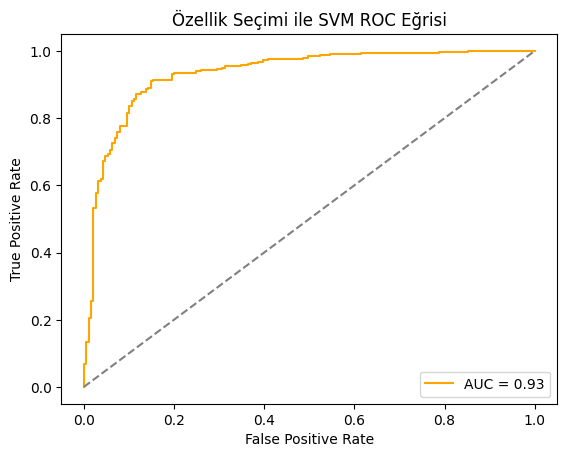

In [136]:
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]  # Pozitif sınıf için olasılıklar
auc_svm = roc_auc_score(y_test, y_proba_svm)

fpr, tpr, thresholds = roc_curve(y_test, y_proba_svm)
print("AUC:", auc_svm)

# ROC eğrisi çizimi
plt.figure()
plt.plot(fpr, tpr, color='orange', label=f'AUC = {auc_svm:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Özellik Seçimi ile SVM ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

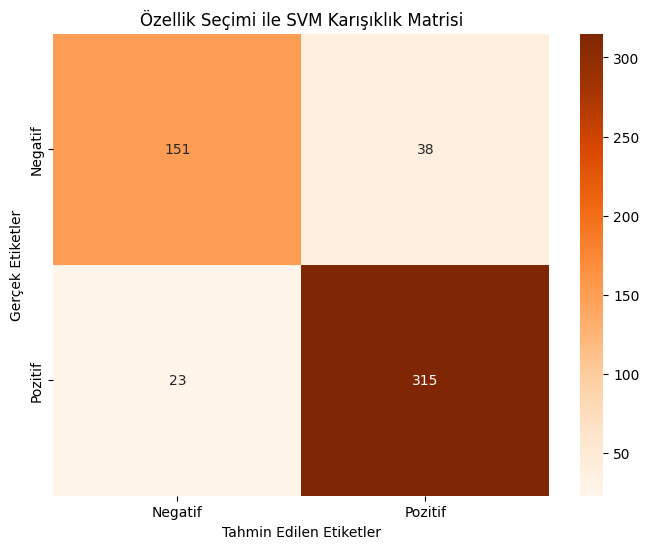

In [139]:
# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Özellik Seçimi ile SVM Karışıklık Matrisi')
plt.show()

## **DT**

In [140]:
from sklearn.tree import DecisionTreeClassifier


# 5. Karar Ağacı modeli oluşturma ve eğitme
decision_tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
decision_tree.fit(X_train_scaled, y_train)

# 6. Modelin eğitim ve test verisi üzerinde tahmin yapması
y_pred_train_dt = decision_tree.predict(X_train_scaled)  # Eğitim seti tahmini
y_pred_test_dt = decision_tree.predict(X_test_scaled)    # Test seti tahmini

# 7. Model performansını değerlendirme
print("Eğitim verisi doğruluğu:", accuracy_score(y_train, y_pred_train_dt))
print("Test verisi doğruluğu:", accuracy_score(y_test, y_pred_test_dt))


Eğitim verisi doğruluğu: 1.0
Test verisi doğruluğu: 0.8994307400379506


In [141]:
# Karışıklık Matrisi ve Sınıflandırma Raporu
conf_matrix_dt = confusion_matrix(y_test, y_pred_test_dt)
class_report_dt = classification_report(y_test, y_pred_test_dt)

print("\nKarışıklık Matrisi (Confusion Matrix):")
print(conf_matrix_dt)
print("\nSınıflandırma Raporu (Classification Report):")
print(class_report_dt)



Karışıklık Matrisi (Confusion Matrix):
[[166  23]
 [ 30 308]]

Sınıflandırma Raporu (Classification Report):
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       189
           1       0.93      0.91      0.92       338

    accuracy                           0.90       527
   macro avg       0.89      0.89      0.89       527
weighted avg       0.90      0.90      0.90       527



In [142]:
# Karışıklık matrisinden metrikleri hesapla
TN, FP, FN, TP = conf_matrix_dt.ravel()

sensitivity_dt = TP / (TP + FN)
specificity_dt = TN / (TN + FP)

print("DT Duyarlılık (Sensitivity):", sensitivity_dt)
print("DT Özgüllük (Specificity):", specificity_dt)

f1_dt = f1_score(y_test, y_pred_test_dt)
print("DT F1 Skoru:", f1_dt)

kappa_dt = cohen_kappa_score(y_test, y_pred_test_dt)
print("DT Cohen's Kappa:", kappa_dt)

DT Duyarlılık (Sensitivity): 0.9112426035502958
DT Özgüllük (Specificity): 0.8783068783068783
DT F1 Skoru: 0.9207772795216741
DT Cohen's Kappa: 0.7831561949272943


AUC: 0.8947747409285871


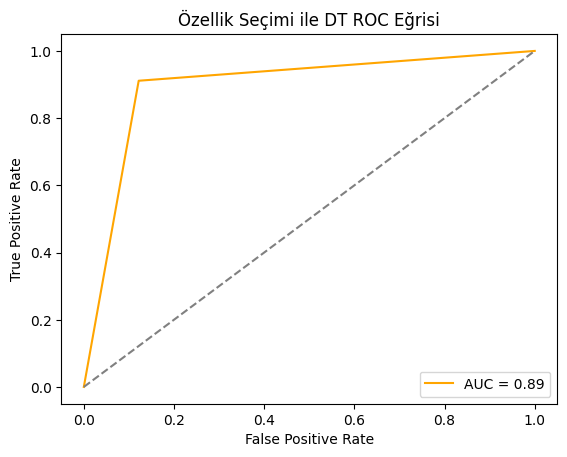

In [143]:
# AUC ve ROC Eğrisi
y_proba_dt = decision_tree.predict_proba(X_test_scaled)[:, 1]  # SVM için olasılık tahminleri
auc_dt = roc_auc_score(y_test, y_proba_dt)

fpr, tpr, thresholds = roc_curve(y_test, y_proba_dt)
print("AUC:", auc_dt)

# ROC eğrisi çizimi
plt.figure()
plt.plot(fpr, tpr, color='orange', label=f'AUC = {auc_dt:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Özellik Seçimi ile DT ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

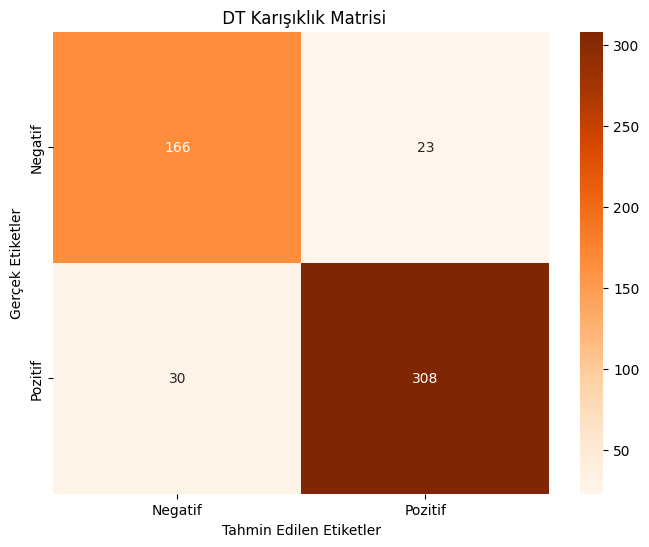

In [145]:
# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title(' DT Karışıklık Matrisi')
plt.show()

## **ANN**

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier


# 5. Yapay Sinir Ağı (ANN) modeli oluşturma ve eğitme
ann_model = MLPClassifier(hidden_layer_sizes=(30,30,30,30),
                          max_iter=10000,
                          activation='relu',
                          solver='adam',
                          random_state=0)

ann_model.fit(X_train_scaled, y_train)

# 6. Modelin test verisi üzerinde tahmin yapması
y_pred_ann = ann_model.predict(X_test_scaled)

# 7. Performans Metriklerini Hesaplama
train_accuracy = accuracy_score(y_train, ann_model.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, y_pred_ann)
conf_matrix = confusion_matrix(y_test, y_pred_ann)
class_report = classification_report(y_test, y_pred_ann)

# Sonuçları yazdırma
print("Eğitim Verisi Doğruluğu:", train_accuracy)
print("Test Verisi Doğruluğu:", test_accuracy)
print("\nKarışıklık Matrisi:")
print(conf_matrix)
print("\nSınıflandırma Raporu:")
print(class_report)


Eğitim Verisi Doğruluğu: 1.0
Test Verisi Doğruluğu: 0.8538899430740038

Karışıklık Matrisi:
[[155  34]
 [ 43 295]]

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       189
           1       0.90      0.87      0.88       338

    accuracy                           0.85       527
   macro avg       0.84      0.85      0.84       527
weighted avg       0.86      0.85      0.85       527



In [147]:
# Karışıklık matrisinden metrikleri hesapla
TN, FP, FN, TP = conf_matrix.ravel()

sensitivity_ann = TP / (TP + FN)
specificity_ann = TN / (TN + FP)

print("ANN Duyarlılık (Sensitivity):", sensitivity_ann)
print("ANN Özgüllük (Specificity):", specificity_ann)

f1_ann = f1_score(y_test, y_pred_ann)
print("ANN F1 Skoru:", f1_ann)

kappa_ann = cohen_kappa_score(y_test, y_pred_ann)
print("ANN Cohen's Kappa:", kappa_ann)

ANN Duyarlılık (Sensitivity): 0.8727810650887574
ANN Özgüllük (Specificity): 0.8201058201058201
ANN F1 Skoru: 0.8845577211394303
ANN Cohen's Kappa: 0.6856899422950311


AUC: 0.9216524216524217


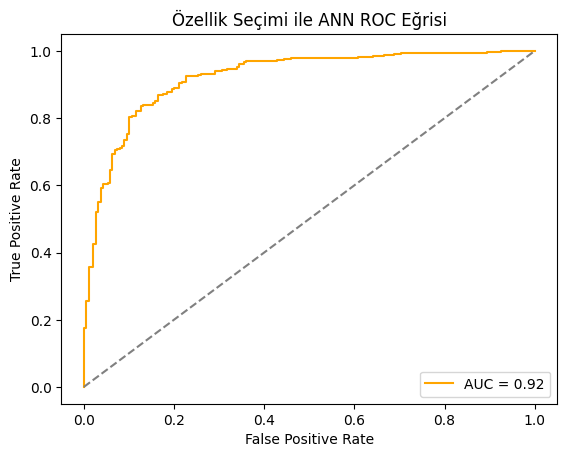

In [148]:
# AUC ve ROC Eğrisi
# AUC ve ROC Eğrisi
y_proba_ann = ann_model.predict_proba(X_test_scaled)[:, 1]  # ANN için olasılık tahminleri
auc_ann = roc_auc_score(y_test, y_proba_ann)

# ROC eğrisi hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_proba_ann)

print("AUC:", auc_ann)

# ROC eğrisi çizimi
plt.figure()
plt.plot(fpr, tpr, color='orange', label=f'AUC = {auc_ann:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Rastgele tahmin çizgisi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Özellik Seçimi ile ANN ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

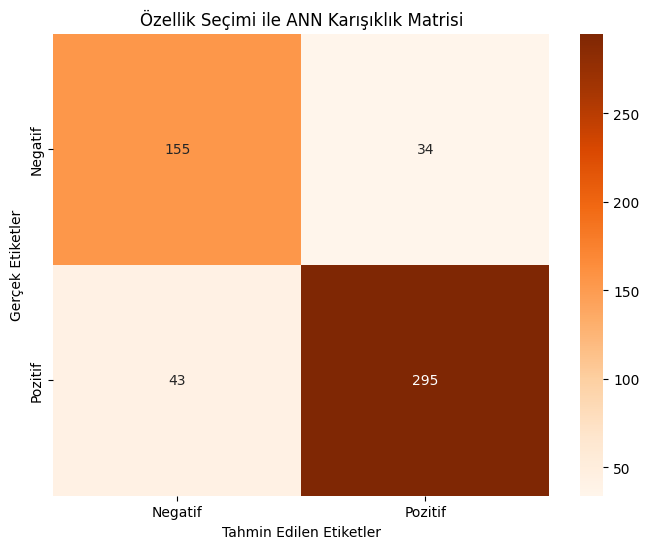

In [149]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Karışıklık matrisini oluşturma
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Negatif', 'Pozitif'],
            yticklabels=['Negatif', 'Pozitif'])

plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Özellik Seçimi ile ANN Karışıklık Matrisi')
plt.show()


## **Sürekli Değişkenler İçin Stacking**

In [150]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

stac = StackingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier()),
        ('svm', SVC(probability=True)),
        ('knn', KNeighborsClassifier())
    ],
    final_estimator=LogisticRegression()
)

In [151]:
stac.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('svm', SVC(probability=True)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [152]:
# Tahminler yapma
y_pred = stac.predict(X_test_scaled)

In [153]:
# Sonuçları değerlendirme
print("Eğitim verisi doğruluğu:", accuracy_score(y_train, stac.predict(X_train_scaled)))
print("Test verisi doğruluğu:", accuracy_score(y_test, y_pred))

Eğitim verisi doğruluğu: 0.9759188846641318
Test verisi doğruluğu: 0.9070208728652751


In [154]:
# 6. Model performansını değerlendirme
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Sonuçları yazdırma
print("\nKarışıklık Matrisi (Confusion Matrix):")
print(conf_matrix)
print("\nSınıflandırma Raporu (Classification Report):")
print(class_report)


Karışıklık Matrisi (Confusion Matrix):
[[161  28]
 [ 21 317]]

Sınıflandırma Raporu (Classification Report):
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       189
           1       0.92      0.94      0.93       338

    accuracy                           0.91       527
   macro avg       0.90      0.89      0.90       527
weighted avg       0.91      0.91      0.91       527



In [155]:
# Karışıklık matrisinden metrikleri hesapla
TN, FP, FN, TP = conf_matrix.ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Duyarlılık (Sensitivity):", sensitivity)
print("Özgüllük (Specificity):", specificity)

# F1 Skoru
f1 = f1_score(y_test, y_pred)
print("F1 Skoru:", f1)

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa:", kappa)

Duyarlılık (Sensitivity): 0.9378698224852071
Özgüllük (Specificity): 0.8518518518518519
F1 Skoru: 0.9282576866764275
Cohen's Kappa: 0.7962216207258466


AUC: 0.9521774521774522


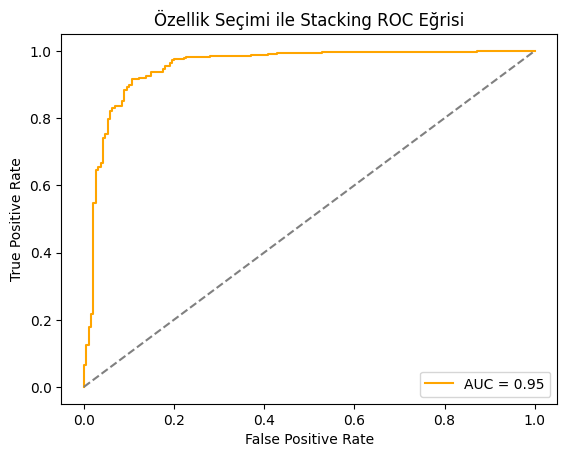

In [156]:
# AUC ve ROC Eğrisi
y_proba = stac.predict_proba(X_test_scaled)[:, 1]  # Yapay Sinir Ağı için olasılık tahminleri
auc = roc_auc_score(y_test, y_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
print("AUC:", auc)

# ROC eğrisi çizimi
plt.figure()
plt.plot(fpr, tpr, color='orange', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Özellik Seçimi ile Stacking ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

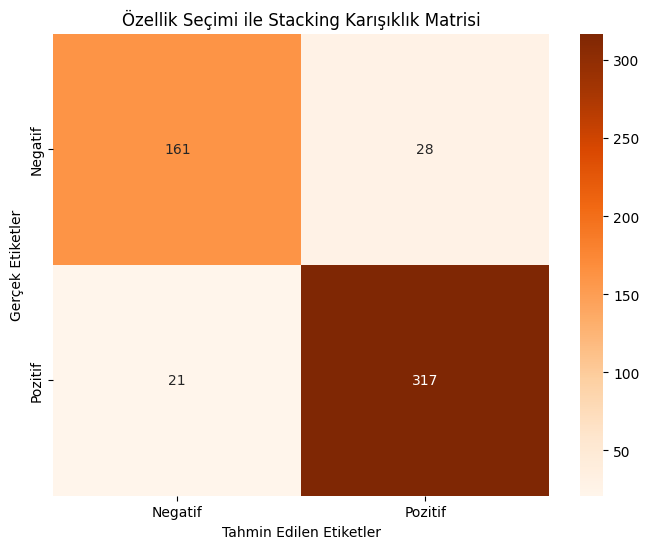

In [157]:
# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Özellik Seçimi ile Stacking Karışıklık Matrisi')
plt.show()